# PLOT

In [ ]:
import numpy as np
import os

folder_path="./data"
loaded_data = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.npz'):
        file_path = os.path.join(folder_path, filename)
        data = np.load(file_path)
        variable_name = filename.split('.')[0]
        loaded_data[variable_name] = [data[f'arr_{i}'] for i in range(len(data.files))]
        print(f"Loaded {variable_name}")

Loaded prune_vit_b_16_top10_p100
Loaded prune_vit_b_16_top1_p10
Loaded prune_vit_b_16_top1_p30
Loaded prune_vit_b_16_top1_p50
Loaded prune_vit_b_16_top20_p100
Loaded prune_vit_b_16_top50_p100
Loaded prune_vit_b_32_top10_p100
Loaded prune_vit_b_32_top1_p10
Loaded prune_vit_b_32_top1_p30
Loaded prune_vit_b_32_top1_p50
Loaded prune_vit_b_32_top20_p100
Loaded prune_vit_b_32_top50_p100
Loaded baseline_vit_b_16
Loaded baseline_vit_b_32
Loaded prune_vit_b_16_top10_p10
Loaded prune_vit_b_16_top10_p30
Loaded prune_vit_b_16_top10_p50
Loaded prune_vit_b_16_top1_p100
Loaded prune_vit_b_16_top20_p10
Loaded prune_vit_b_16_top20_p30
Loaded prune_vit_b_16_top20_p50
Loaded prune_vit_b_16_top50_p10
Loaded prune_vit_b_16_top50_p30
Loaded prune_vit_b_16_top50_p50
Loaded prune_vit_b_16_top5_p100
Loaded prune_vit_b_16_top5_p10
Loaded prune_vit_b_16_top5_p30
Loaded prune_vit_b_16_top5_p50
Loaded prune_vit_b_32_top10_p10
Loaded prune_vit_b_32_top10_p30
Loaded prune_vit_b_32_top10_p50
Loaded prune_vit_b_32_top

In [7]:
loaded_data["prune_vit_b_16_top5_p100"][1].mean()

0.6878632179781055

/tmp/ipykernel_23438/2263080684.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, ci=None)
/tmp/ipykernel_23438/2263080684.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_23438/2263080684.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, ci=None)
/tmp/ipykernel_23438/2263080684.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_23438/2263080684.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, ci=None)
/tmp/ipykernel_23438/226308068

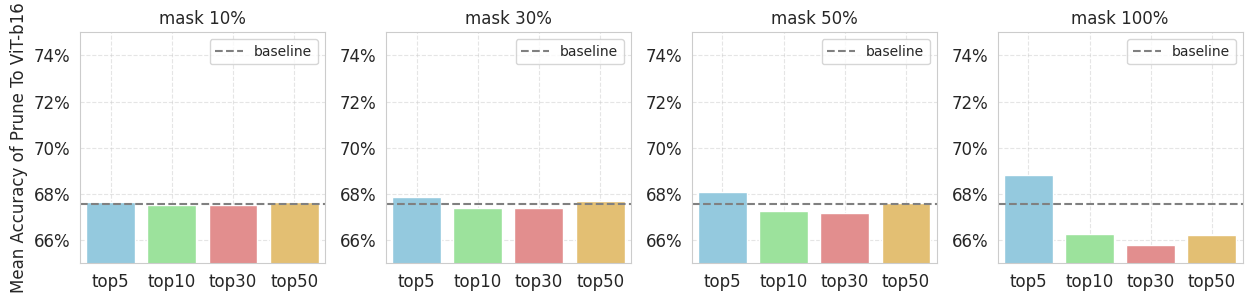

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Add NumPy for calculating the mean
from matplotlib.ticker import FuncFormatter

sns.set_style("whitegrid")

box_colors = ['skyblue', 'lightgreen', 'lightcoral', '#f6c660']  # Removed lightpink for baseline
# box_colors = ['#D6CCE5', '#90EE90', '#D2E9CF', '#f6c660']  # skyblue, lightgreen, lightcoral, yellow in HEX

Name = "Mean Accuracy of Prune To ViT-b16"

# Extract baseline value
baseline_value = loaded_data["baseline_vit_b_16"][0].mean()

# Remove baseline from prune data
prune_data = [ 
    [loaded_data[f"prune_vit_b_16_top5_p10"][1], loaded_data["prune_vit_b_16_top10_p10"][1], loaded_data["prune_vit_b_16_top20_p10"][1], loaded_data["prune_vit_b_16_top50_p10"][1]],
    [loaded_data[f"prune_vit_b_16_top5_p30"][1], loaded_data["prune_vit_b_16_top10_p30"][1], loaded_data["prune_vit_b_16_top20_p30"][1], loaded_data["prune_vit_b_16_top50_p30"][1]],
    [loaded_data[f"prune_vit_b_16_top5_p50"][1], loaded_data["prune_vit_b_16_top10_p50"][1], loaded_data["prune_vit_b_16_top20_p50"][1], loaded_data["prune_vit_b_16_top50_p50"][1]],
    [loaded_data[f"prune_vit_b_16_top5_p100"][1], loaded_data["prune_vit_b_16_top10_p100"][1], loaded_data["prune_vit_b_16_top20_p100"][1], loaded_data["prune_vit_b_16_top50_p100"][1]]
]

labels = ["mask 10%", "mask 30%", "mask 50%", "mask 100%"]
x_labels = ["top5", "top10", "top30", "top50"]

# Create a figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

# Custom formatter function for y-axis labels
def percentage_formatter(x, pos):
    return '{:.0f}%'.format(x * 100)

# Adjust font sizes
plt.rcParams.update({'font.size': 10})

# Plot the data using barplot
for subplot_id, (model_data, label, ax) in enumerate(zip(prune_data, labels, axes)):
    # Convert list of data into a suitable format for sns.barplot
    sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, errorbar=None)

    # Add baseline as a horizontal dashed line
    ax.axhline(y=baseline_value, color='grey', linestyle='--', linewidth=1.5, label='baseline')

    ax.set_title(label, fontsize=12)
    if not subplot_id: 
        ax.set_ylabel("Mean Accuracy of Prune To ViT-b16", fontsize=12)
    ax.set_xticklabels(x_labels, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
    ax.set_ylim(0.65, 0.75)
    
    # Set y-axis formatter to percentage
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

    # Add legend for the baseline
    ax.legend(loc='upper right', fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.25)

# Save the figure
plt.savefig(f"imgs/MeanAcc_{Name}.pdf", bbox_inches="tight")


/tmp/ipykernel_23438/226564407.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, ci=None)
/tmp/ipykernel_23438/226564407.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_23438/226564407.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, ci=None)
/tmp/ipykernel_23438/226564407.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_23438/226564407.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, ci=None)
/tmp/ipykernel_23438/226564407.py:4

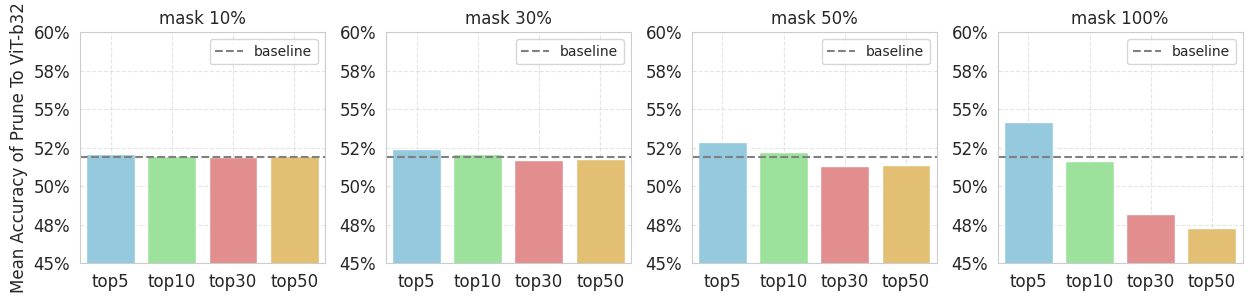

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Add NumPy for calculating the mean
from matplotlib.ticker import FuncFormatter

sns.set_style("whitegrid")

box_colors = ['skyblue', 'lightgreen', 'lightcoral', '#f6c660']  # Removed lightpink for baseline
# box_colors = ['#D6CCE5', '#90EE90', '#D2E9CF', '#f6c660']  # skyblue, lightgreen, lightcoral, yellow in HEX

Name = "Mean Accuracy of Prune To ViT-b32"

# Extract baseline value
baseline_value = loaded_data["baseline_vit_b_32"][0].mean()

# Remove baseline from prune data
prune_data = [ 
    [loaded_data[f"prune_vit_b_32_top5_p10"][1], loaded_data["prune_vit_b_32_top10_p10"][1], loaded_data["prune_vit_b_32_top20_p10"][1], loaded_data["prune_vit_b_32_top50_p10"][1]],
    [loaded_data[f"prune_vit_b_32_top5_p30"][1], loaded_data["prune_vit_b_32_top10_p30"][1], loaded_data["prune_vit_b_32_top20_p30"][1], loaded_data["prune_vit_b_32_top50_p30"][1]],
    [loaded_data[f"prune_vit_b_32_top5_p50"][1], loaded_data["prune_vit_b_32_top10_p50"][1], loaded_data["prune_vit_b_32_top20_p50"][1], loaded_data["prune_vit_b_32_top50_p50"][1]],
    [loaded_data[f"prune_vit_b_32_top5_p100"][1], loaded_data["prune_vit_b_32_top10_p100"][1], loaded_data["prune_vit_b_32_top20_p100"][1], loaded_data["prune_vit_b_32_top50_p100"][1]]
]

labels = ["mask 10%", "mask 30%", "mask 50%", "mask 100%"]
x_labels = ["top5", "top10", "top30", "top50"]

# Create a figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

# Custom formatter function for y-axis labels
def percentage_formatter(x, pos):
    return '{:.0f}%'.format(x * 100)

# Adjust font sizes
plt.rcParams.update({'font.size': 10})

# Plot the data using barplot
for subplot_id, (model_data, label, ax) in enumerate(zip(prune_data, labels, axes)):
    # Convert list of data into a suitable format for sns.barplot
    sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, errorbar=None)

    # Add baseline as a horizontal dashed line
    ax.axhline(y=baseline_value, color='grey', linestyle='--', linewidth=1.5, label='baseline')

    ax.set_title(label, fontsize=12)
    if not subplot_id: 
        ax.set_ylabel("Mean Accuracy of Prune To ViT-b32", fontsize=12)
    ax.set_xticklabels(x_labels, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
    ax.set_ylim(0.45, 0.6)
    
    # Set y-axis formatter to percentage
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

    # Add legend for the baseline
    ax.legend(loc='upper right', fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.25)

# Save the figure
plt.savefig(f"imgs/MeanAcc_{Name}.pdf", bbox_inches="tight")


/tmp/ipykernel_23438/3674250191.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_23438/3674250191.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_23438/3674250191.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_23438/3674250191.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_23438/3674250191.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_23438/3674250191.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_23438/3674250191.py:64: UserWarning: 

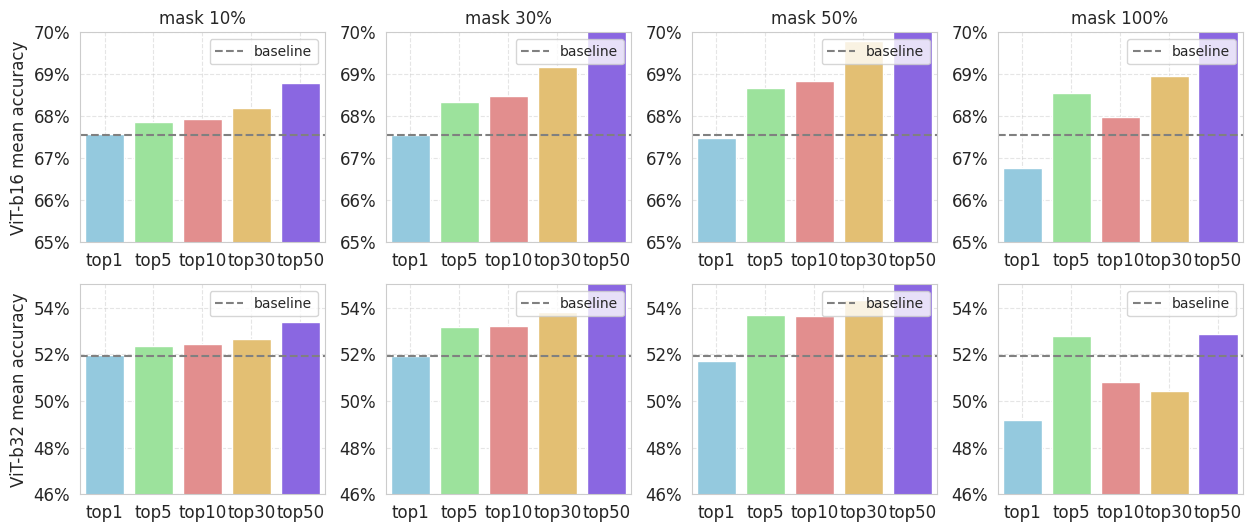

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

sns.set_style("whitegrid")

box_colors = ['#87CEEB', '#90EE90', '#F08080', '#f6c660', "#8153f5"]  # HEX colors

Name = "Mean Accuracy of Prune To ViT"

# Extract baseline values
baseline_value_b16 = loaded_data["baseline_vit_b_16"][0].mean()
baseline_value_b32 = loaded_data["baseline_vit_b_32"][0].mean()

# Remove baseline from prune data for both ViT-b16 and ViT-b32
prune_data_b16 = [ 
    [loaded_data["prune_vit_b_16_top1_p10"][1],loaded_data[f"prune_vit_b_16_top5_p10"][1], loaded_data["prune_vit_b_16_top10_p10"][1], loaded_data["prune_vit_b_16_top20_p10"][1], loaded_data["prune_vit_b_16_top50_p10"][1]],
    [loaded_data["prune_vit_b_16_top1_p30"][1],loaded_data[f"prune_vit_b_16_top5_p30"][1], loaded_data["prune_vit_b_16_top10_p30"][1], loaded_data["prune_vit_b_16_top20_p30"][1], loaded_data["prune_vit_b_16_top50_p30"][1]],
    [loaded_data["prune_vit_b_16_top1_p50"][1],loaded_data[f"prune_vit_b_16_top5_p50"][1], loaded_data["prune_vit_b_16_top10_p50"][1], loaded_data["prune_vit_b_16_top20_p50"][1], loaded_data["prune_vit_b_16_top50_p50"][1]],
    [loaded_data["prune_vit_b_16_top1_p100"][1],loaded_data[f"prune_vit_b_16_top5_p100"][1], loaded_data["prune_vit_b_16_top10_p100"][1], loaded_data["prune_vit_b_16_top20_p100"][1], loaded_data["prune_vit_b_16_top50_p100"][1]]
]

prune_data_b32 = [ 
    [loaded_data["prune_vit_b_32_top1_p10"][1],loaded_data[f"prune_vit_b_32_top5_p10"][1], loaded_data["prune_vit_b_32_top10_p10"][1], loaded_data["prune_vit_b_32_top20_p10"][1], loaded_data["prune_vit_b_32_top50_p10"][1]],
    [loaded_data["prune_vit_b_32_top1_p30"][1],loaded_data[f"prune_vit_b_32_top5_p30"][1], loaded_data["prune_vit_b_32_top10_p30"][1], loaded_data["prune_vit_b_32_top20_p30"][1], loaded_data["prune_vit_b_32_top50_p30"][1]],
    [loaded_data["prune_vit_b_32_top1_p50"][1],loaded_data[f"prune_vit_b_32_top5_p50"][1], loaded_data["prune_vit_b_32_top10_p50"][1], loaded_data["prune_vit_b_32_top20_p50"][1], loaded_data["prune_vit_b_32_top50_p50"][1]],
    [loaded_data["prune_vit_b_32_top1_p100"][1],loaded_data[f"prune_vit_b_32_top5_p100"][1], loaded_data["prune_vit_b_32_top10_p100"][1], loaded_data["prune_vit_b_32_top20_p100"][1], loaded_data["prune_vit_b_32_top50_p100"][1]]
]

labels = ["mask 10%", "mask 30%", "mask 50%", "mask 100%"]
x_labels = ["top1","top5", "top10", "top30", "top50"]

# Create a figure and axis objects for two rows and four columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

# Custom formatter function for y-axis labels
def percentage_formatter(x, pos):
    return '{:.0f}%'.format(x * 100)

# Adjust font sizes
plt.rcParams.update({'font.size': 10})

# Plot the data using barplot for ViT-b16 (first row)
for subplot_id, (model_data, label, ax) in enumerate(zip(prune_data_b16, labels, axes[0])):
    sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, errorbar=None)
    ax.axhline(y=baseline_value_b16, color='grey', linestyle='--', linewidth=1.5, label='baseline')
    ax.set_title(label, fontsize=12)
    if not subplot_id: 
        ax.set_ylabel("ViT-b16 mean accuracy", fontsize=12)
    ax.set_xticklabels(x_labels, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylim(0.65, 0.7)
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax.legend(loc='upper right', fontsize=10)

# Plot the data using barplot for ViT-b32 (second row)
for subplot_id, (model_data, _, ax) in enumerate(zip(prune_data_b32, labels, axes[1])):
    sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, errorbar=None)
    ax.axhline(y=baseline_value_b32, color='grey', linestyle='--', linewidth=1.5, label='baseline')
    if not subplot_id: 
        ax.set_ylabel("ViT-b32 mean accuracy", fontsize=12)
    ax.set_xticklabels(x_labels, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylim(0.46, 0.55)
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax.legend(loc='upper right', fontsize=10)

# Adjust spacing between subplots to make them tighter
plt.subplots_adjust(hspace=0.2, wspace=0.25)

# Save the figure
plt.savefig(f"imgs/Split_{Name}.pdf", bbox_inches="tight")

/tmp/ipykernel_40037/4197358332.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_40037/4197358332.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_40037/4197358332.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_40037/4197358332.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_40037/4197358332.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_40037/4197358332.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=12)
/tmp/ipykernel_40037/4197358332.py:67: UserWarning: 

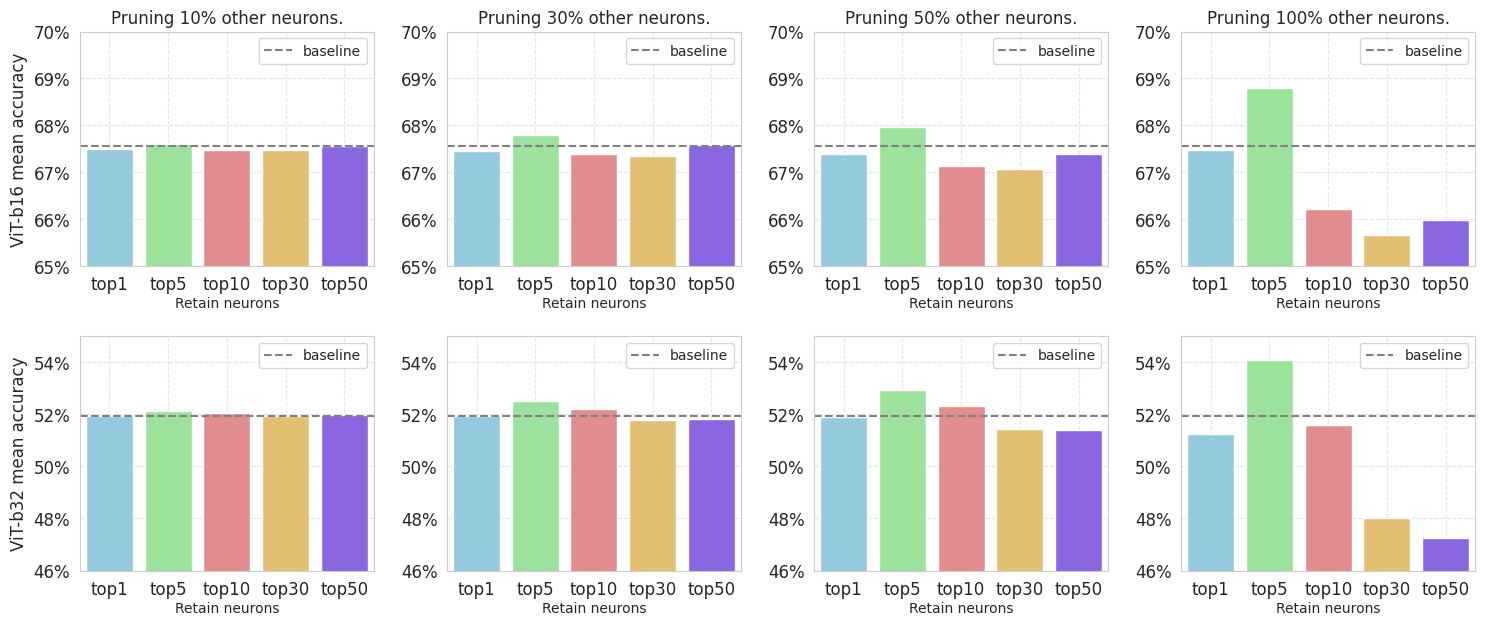

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

sns.set_style("whitegrid")

box_colors = ['#87CEEB', '#90EE90', '#F08080', '#f6c660', "#8153f5"]  # HEX colors

Name = "Mean Accuracy of Prune To ViT"

# Extract baseline values
baseline_value_b16 = loaded_data["baseline_vit_b_16"][0].mean()
baseline_value_b32 = loaded_data["baseline_vit_b_32"][0].mean()

# Remove baseline from prune data for both ViT-b16 and ViT-b32
prune_data_b16 = [ 
    [loaded_data["prune_vit_b_16_top1_p10"][1],loaded_data[f"prune_vit_b_16_top5_p10"][1], loaded_data["prune_vit_b_16_top10_p10"][1], loaded_data["prune_vit_b_16_top20_p10"][1], loaded_data["prune_vit_b_16_top50_p10"][1]],
    [loaded_data["prune_vit_b_16_top1_p30"][1],loaded_data[f"prune_vit_b_16_top5_p30"][1], loaded_data["prune_vit_b_16_top10_p30"][1], loaded_data["prune_vit_b_16_top20_p30"][1], loaded_data["prune_vit_b_16_top50_p30"][1]],
    [loaded_data["prune_vit_b_16_top1_p50"][1],loaded_data[f"prune_vit_b_16_top5_p50"][1], loaded_data["prune_vit_b_16_top10_p50"][1], loaded_data["prune_vit_b_16_top20_p50"][1], loaded_data["prune_vit_b_16_top50_p50"][1]],
    [loaded_data["prune_vit_b_16_top1_p100"][1],loaded_data[f"prune_vit_b_16_top5_p100"][1], loaded_data["prune_vit_b_16_top10_p100"][1], loaded_data["prune_vit_b_16_top20_p100"][1], loaded_data["prune_vit_b_16_top50_p100"][1]]
]

prune_data_b32 = [ 
    [loaded_data["prune_vit_b_32_top1_p10"][1],loaded_data[f"prune_vit_b_32_top5_p10"][1], loaded_data["prune_vit_b_32_top10_p10"][1], loaded_data["prune_vit_b_32_top20_p10"][1], loaded_data["prune_vit_b_32_top50_p10"][1]],
    [loaded_data["prune_vit_b_32_top1_p30"][1],loaded_data[f"prune_vit_b_32_top5_p30"][1], loaded_data["prune_vit_b_32_top10_p30"][1], loaded_data["prune_vit_b_32_top20_p30"][1], loaded_data["prune_vit_b_32_top50_p30"][1]],
    [loaded_data["prune_vit_b_32_top1_p50"][1],loaded_data[f"prune_vit_b_32_top5_p50"][1], loaded_data["prune_vit_b_32_top10_p50"][1], loaded_data["prune_vit_b_32_top20_p50"][1], loaded_data["prune_vit_b_32_top50_p50"][1]],
    [loaded_data["prune_vit_b_32_top1_p100"][1],loaded_data[f"prune_vit_b_32_top5_p100"][1], loaded_data["prune_vit_b_32_top10_p100"][1], loaded_data["prune_vit_b_32_top20_p100"][1], loaded_data["prune_vit_b_32_top50_p100"][1]]
]

labels = ["Pruning 10% other neurons.", "Pruning 30% other neurons.", "Pruning 50% other neurons.", "Pruning 100% other neurons."]
x_labels = ["top1","top5", "top10", "top30", "top50"]

# Create a figure and axis objects for two rows and four columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 7))

# Custom formatter function for y-axis labels
def percentage_formatter(x, pos):
    return '{:.0f}%'.format(x * 100)

# Adjust font sizes
plt.rcParams.update({'font.size': 10})

# Plot the data using barplot for ViT-b16 (first row)
for subplot_id, (model_data, label, ax) in enumerate(zip(prune_data_b16, labels, axes[0])):
    sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, errorbar=None)
    ax.axhline(y=baseline_value_b16, color='grey', linestyle='--', linewidth=1.5, label='baseline')
    ax.set_title(label, fontsize=12)
    if not subplot_id: 
        ax.set_ylabel("ViT-b16 mean accuracy", fontsize=12)
    ax.set_xticklabels(x_labels, fontsize=12)
    # ax.set_xticklabels(x_labels, rotation=20, ha='right', fontsize=12)
    ax.text(.5, -0.13, "Retain neurons", ha='center', va='top', transform=ax.transAxes, fontsize=10)

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylim(0.65, 0.70)
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax.legend(loc='upper right', fontsize=10)

# Plot the data using barplot for ViT-b32 (second row)
for subplot_id, (model_data, _, ax) in enumerate(zip(prune_data_b32, labels, axes[1])):
    sns.barplot(data=model_data, ax=ax, palette=box_colors, estimator=np.mean, errorbar=None)
    ax.axhline(y=baseline_value_b32, color='grey', linestyle='--', linewidth=1.5, label='baseline')
    if not subplot_id:  
        ax.set_ylabel("ViT-b32 mean accuracy", fontsize=12)
    ax.set_xticklabels(x_labels, fontsize=12)
    # ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=12)
    ax.text(.5, -0.13, "Retain neurons", ha='center', va='top', transform=ax.transAxes, fontsize=10)

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylim(0.46, 0.55)
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax.legend(loc='upper right', fontsize=10)

# Adjust spacing between subplots to make them tighter
plt.subplots_adjust(hspace=0.3, wspace=0.25)

# Save the figure
# plt.savefig(f"imgs/Split_{Name}.pdf", bbox_inches="tight")
plt.savefig(f"imgs/Split4010_{Name}.pdf", bbox_inches="tight")
